In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import pandas as pd
import scipy.io
from skimage.transform import resize
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
gc.collect()
import os
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import cv2
import keras

Using TensorFlow backend.


In [2]:
data= pd.read_csv("/Users/charleshajjar/Desktop/annotation_dent/vott-csv-export/dent-export.csv")

In [3]:
type(data["label"][0])

str

In [4]:
paths= "/Users/charleshajjar/Desktop/annotation_dent/vott-csv-export/"

In [5]:
data["image"]= paths+data["image"]

In [6]:
data

image         xmin  \
0     /Users/charleshajjar/Desktop/annotation_dent/v...  1404.222620   
1     /Users/charleshajjar/Desktop/annotation_dent/v...  1522.693861   
2     /Users/charleshajjar/Desktop/annotation_dent/v...  1617.767995   
3     /Users/charleshajjar/Desktop/annotation_dent/v...  1729.316950   
4     /Users/charleshajjar/Desktop/annotation_dent/v...  1822.795327   
...                                                 ...          ...   
1256  /Users/charleshajjar/Desktop/annotation_dent/v...  1043.295279   
1257  /Users/charleshajjar/Desktop/annotation_dent/v...   971.620227   
1258  /Users/charleshajjar/Desktop/annotation_dent/v...   870.564048   
1259  /Users/charleshajjar/Desktop/annotation_dent/v...   697.968266   
1260  /Users/charleshajjar/Desktop/annotation_dent/v...   602.510642   

            ymin         xmax        ymax label  
0     159.898838  1528.504620  507.119391    21  
1     191.673678  1607.313032  494.867788    22  
2     156.880008  1732.156298  499.440104    23  
3     195.353566  1824.071933  500.641026    24  
4     221.101763  1938.328173  518.974359    25  
...          ...          ...         ...   ...  
1256  296.656232  1168.890286  597.011223    13  
1257  362.715159  1082.428728  610.554543    14  
1258  343.883065   985.323142  626.229161    15  
1259  334.647445   878.115325  621.752309    16  
1260  414.813528   730.893640  545.758606    17  

[1261 rows x 6 columns]

In [7]:
from sklearn.model_selection import train_test_split
path, path_val = train_test_split(data, test_size=0.20, random_state=0)

In [8]:
path_val.shape

(253, 6)

In [9]:
dir_anno='/Users/charleshajjar/Desktop/annotation_dent/dent-PascalVOC-export/Annotations/'

In [10]:
import os 
import numpy as np
import xml.etree.ElementTree as ET
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd 

In [11]:
def extract_single_xml_file(tree):
    Nobj = 0
    row  = OrderedDict()
    for elems in tree.iter():

        if elems.tag == "size":
            for elem in elems:
                row[elem.tag] = int(elem.text)
        if elems.tag == "object":
            for elem in elems:
                if elem.tag == "name":
                    row["bbx_{}_{}".format(Nobj,elem.tag)] = str(elem.text)              
                if elem.tag == "bndbox":
                    for k in elem:
                        row["bbx_{}_{}".format(Nobj,k.tag)] = float(k.text)
                    Nobj += 1
    row["Nobj"] = Nobj
    return(row)


In [12]:
df_anno = []
for fnm in os.listdir(dir_anno):  
    if not fnm.startswith('.'): ## do not include hidden folders/files
        tree = ET.parse(os.path.join(dir_anno,fnm))
        row = extract_single_xml_file(tree)
        row["fileID"] = fnm.split(".")[0]
        df_anno.append(row)
df_anno = pd.DataFrame(df_anno)

maxNobj = np.max(df_anno["Nobj"])

In [13]:
print("columns in df_anno\n-----------------")
for icol, colnm in enumerate(df_anno.columns):
    print("{:3.0f}: {}".format(icol,colnm))
print("-"*30)
print("df_anno.shape={}=(N frames, N columns)".format(df_anno.shape))
#df_anno.head()

columns in df_anno
-----------------
  0: width
  1: height
  2: depth
  3: bbx_0_name
  4: bbx_0_xmin
  5: bbx_0_ymin
  6: bbx_0_xmax
  7: bbx_0_ymax
  8: bbx_1_name
  9: bbx_1_xmin
 10: bbx_1_ymin
 11: bbx_1_xmax
 12: bbx_1_ymax
 13: bbx_2_name
 14: bbx_2_xmin
 15: bbx_2_ymin
 16: bbx_2_xmax
 17: bbx_2_ymax
 18: bbx_3_name
 19: bbx_3_xmin
 20: bbx_3_ymin
 21: bbx_3_xmax
 22: bbx_3_ymax
 23: bbx_4_name
 24: bbx_4_xmin
 25: bbx_4_ymin
 26: bbx_4_xmax
 27: bbx_4_ymax
 28: bbx_5_name
 29: bbx_5_xmin
 30: bbx_5_ymin
 31: bbx_5_xmax
 32: bbx_5_ymax
 33: bbx_6_name
 34: bbx_6_xmin
 35: bbx_6_ymin
 36: bbx_6_xmax
 37: bbx_6_ymax
 38: bbx_7_name
 39: bbx_7_xmin
 40: bbx_7_ymin
 41: bbx_7_xmax
 42: bbx_7_ymax
 43: bbx_8_name
 44: bbx_8_xmin
 45: bbx_8_ymin
 46: bbx_8_xmax
 47: bbx_8_ymax
 48: bbx_9_name
 49: bbx_9_xmin
 50: bbx_9_ymin
 51: bbx_9_xmax
 52: bbx_9_ymax
 53: bbx_10_name
 54: bbx_10_xmin
 55: bbx_10_ymin
 56: bbx_10_xmax
 57: bbx_10_ymax
 58: bbx_11_name
 59: bbx_11_xmin
 60: bbx_1

In [14]:
dir_preprocessed = "/Users/charleshajjar/Desktop/annotation_dent/dent-PascalVOC-export/"
df_anno.to_csv(os.path.join(dir_preprocessed,"df_anno.csv"),index=False)
df_anno

width  height  depth bbx_0_name   bbx_0_xmin  bbx_0_ymin   bbx_0_xmax  \
0    2850    1300      3         31  1423.598346  698.483456  1508.111213   
1    3000    1300      3         21  1484.592686  295.849144  1622.968266   
2    2700    1300      3         11  1206.795424  332.948842  1323.562065   
3    2920    1200      3         31  1489.286636  615.193153  1580.701432   
4    3000    1270      3         21  1495.610004  316.519912  1621.613777   
5    2850    1150      3         11  1306.973805  204.285386  1417.463235   
6    3000    1150      3         48   590.690306  456.471635   761.331753   
7    2800    1170      3        NaN          NaN         NaN          NaN   
8    2900    1100      3         31  1447.287797  492.762823  1525.450690   
9    2870    1300      3         21  1509.114825  278.487151  1633.534249   
10   2940    1200      3         31  1429.004692  550.059186  1480.607343   
11   2730    1100      3         21  1404.222620  159.898838  1528.504620   
12   3000    1050      3         21  1474.857295   40.374378  1602.517899   
13   2980    1250      3         21  1507.394866  268.699007  1622.683904   
14   2914    1220      3         31  1503.541489  643.840633  1577.770583   
15   3000    1230      3         21  1440.934598  183.292172  1564.374516   
16   2800    1250      3         21  1407.810888  347.660761  1507.817337   
17   3000    1150      3         21  1452.411474  171.671791  1587.703173   
18   2860    1270      3         11  1332.635207  260.449219  1474.445385   
19   2950    1150      3         21  1402.553373  157.594969  1544.592525   
20   3000    1200      3         21  1495.779315  138.619523  1630.526800   
21   2900    1245      3         21  1432.218702  211.985286  1557.050197   
22   2950    1150      3         21  1464.689556  232.833168  1574.893576   
23   3000    1270      3         21  1488.148220  132.880526  1619.376451   
24   2970    1170      3         11  1366.565886  144.359661  1481.923012   
25   2900    1100      3         21  1454.348878  215.217391  1579.156992   
26   3000    1300      3         31  1492.489841  509.323847  1586.336591   
27   2900    1250      3         21  1424.853667  323.410399  1525.976764   
28   3000    1100      3         21  1497.871517   93.865537  1616.860971   
29   2980    1270      3         21  1453.312210  237.212091  1570.511320   
30   3000    1250      3         31  1492.683340  576.256478  1572.755418   
31   2980    1050      3         21  1565.898317   62.148896  1689.428293   
32   2850    1150      3         21  1412.132353  184.788603  1567.589614   
33   3000    1250      3         11  1321.654896  205.585744  1461.699400   
34   2850    1300      3         21  1427.056526  308.823529  1546.610754   
35   3000    1200      3        NaN          NaN         NaN          NaN   
36   3000    1150      3         21  1561.798568   49.062921  1683.436533   
37   3000    1200      3         21  1518.720975  226.002738  1635.545666   
38   2900    1150      3         21  1466.214767  183.501180  1588.801680   
39   3000    1150      3         21  1492.647059   29.302139  1628.894156   
40   3000    1300      3         21  1493.820143   94.380580  1640.129160   
41   3000    1200      3         21  1475.691757  203.749195  1592.818789   
42   3000    1200      3         21  1462.799923  157.731959  1608.105166   
43   2800    1250      3         21  1364.805857  221.418068  1496.270317   
44   2900    1300      3         31  1523.825706  586.195817  1596.038119   
45   2800    1300      3         21  1385.574690  236.031250  1519.669118   
46   3000    1300      3         41  1391.108746  586.160714  1467.443885   
47   3000    1200      3        NaN          NaN         NaN          NaN   
48   2760    1100      3         21  1404.032508  136.954542  1522.058824   

    bbx_0_ymax bbx_1_name   bbx_1_xmin  ...  bbx_30_name  bbx_30_xmin  \
0   906.640625         32  1517.325368  ...          NaN          NaN   
1   639

In [15]:
#La première étape de l'élaboration d'un modèle consiste à comprendre les données.

#Histogramme du nombre d'objets par image
#La plupart des cadres ne contiennent qu'un seul objet.

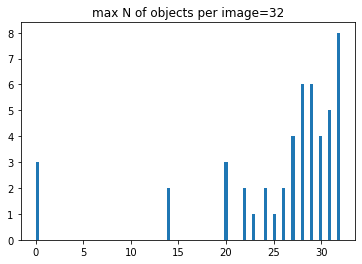

In [16]:
plt.hist(df_anno["Nobj"].values,bins=100)
plt.title("max N of objects per image={}".format(maxNobj))
plt.show()

Counter({'41': 45, '22': 45, '13': 45, '44': 45, '21': 44, '11': 44, '32': 44, '12': 44, '42': 44, '33': 44, '23': 44, '24': 44, '31': 43, '43': 43, '34': 43, '15': 43, '17': 43, '37': 41, '25': 41, '16': 41, '14': 40, '35': 40, '47': 39, '26': 39, '45': 37, '27': 36, '36': 31, '46': 29, '48': 28, '38': 26, '28': 24, '18': 21, 'spoon': 1})


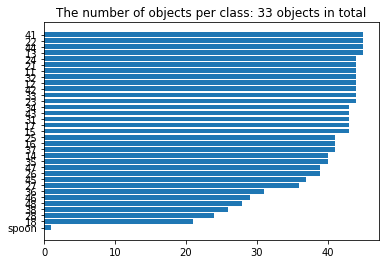

In [17]:
from collections import Counter
class_obj = []
for ibbx in range(maxNobj):
    class_obj.extend(df_anno["bbx_{}_name".format(ibbx)].values)
class_obj = np.array(class_obj)

count             = Counter(class_obj[class_obj != 'nan'])
print(count)
class_nm          = list(count.keys())
class_count       = list(count.values())
asort_class_count = np.argsort(class_count)

class_nm          = np.array(class_nm)[asort_class_count]
class_count       = np.array(class_count)[asort_class_count]

xs = range(len(class_count))
plt.barh(xs,class_count)
plt.yticks(xs,class_nm)
plt.title("The number of objects per class: {} objects in total".format(len(count)))
plt.show()

In [18]:
#Visualisez les images sélectionnées au hasard avec des annotations
#Quelques constatations
#La forme de l'image diffère selon les images.
#Certaines boîtes englobantes sont superposées.

In [19]:
img_dir='/Users/charleshajjar/Desktop/annotation_dent/dent-PascalVOC-export/JPEGImages'

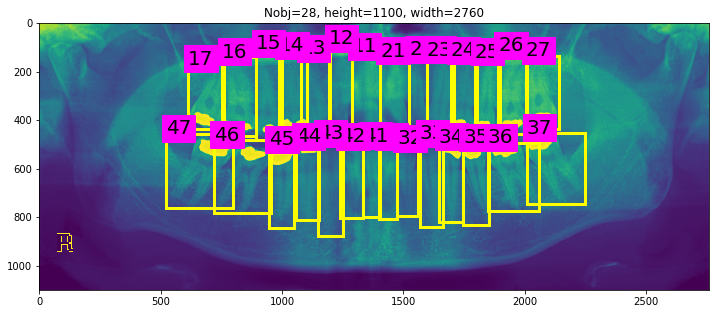

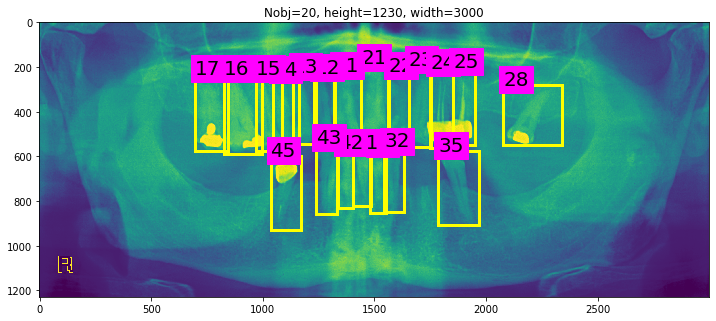

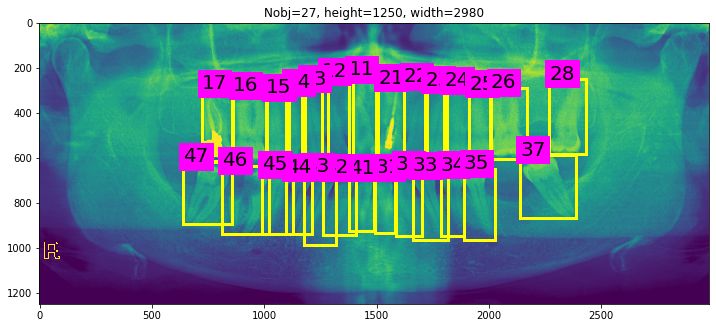

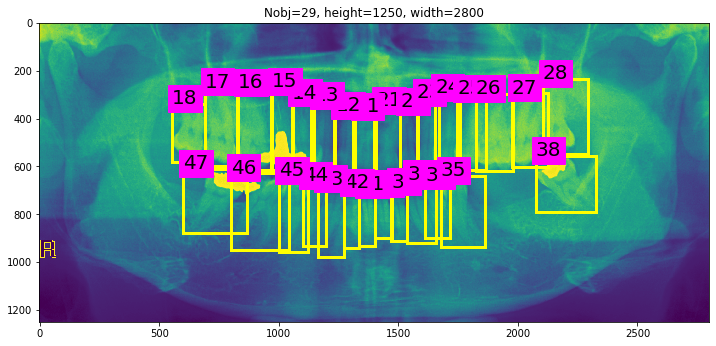

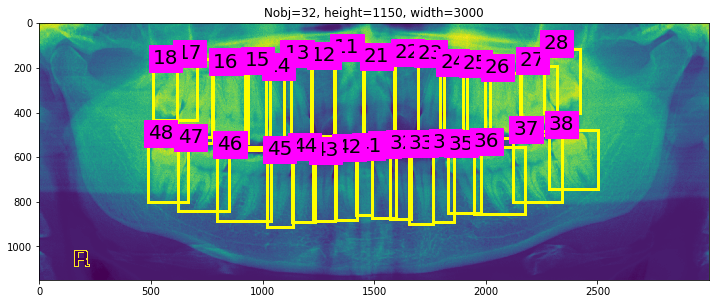

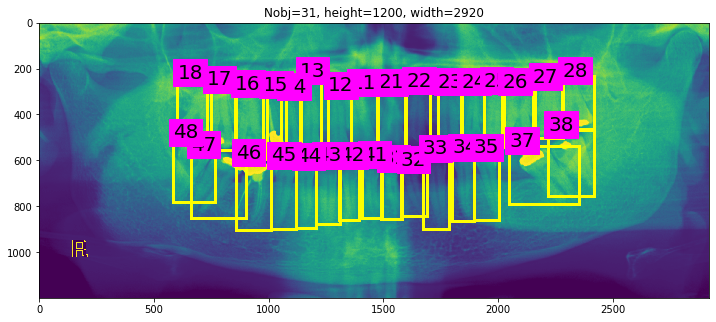

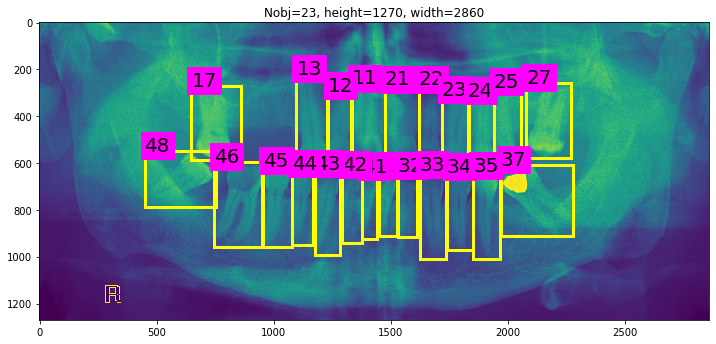

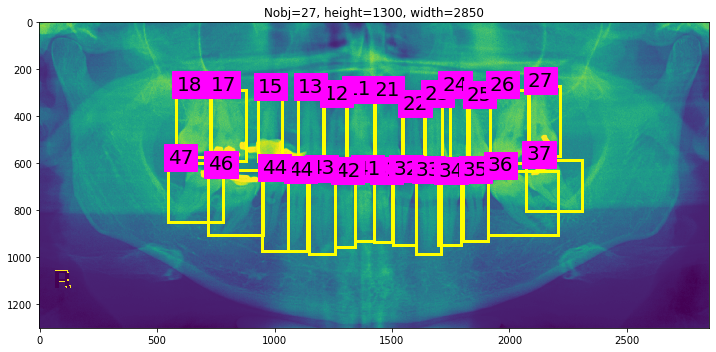

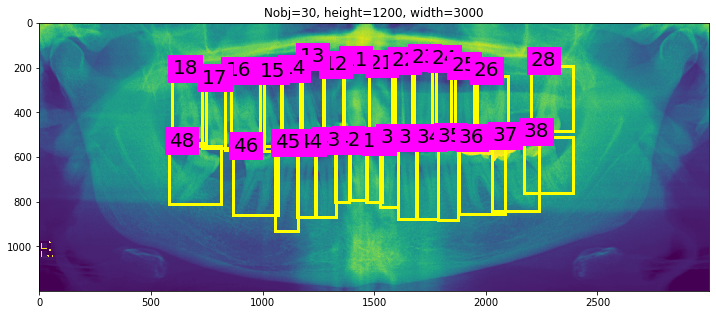

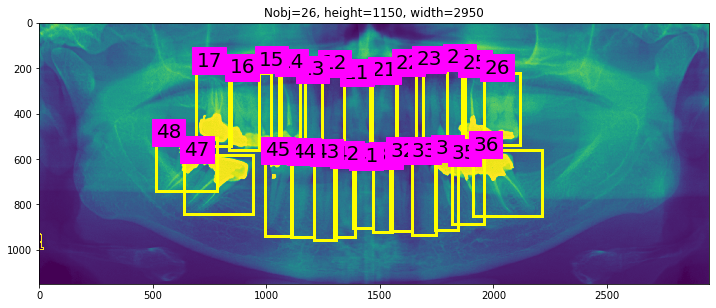

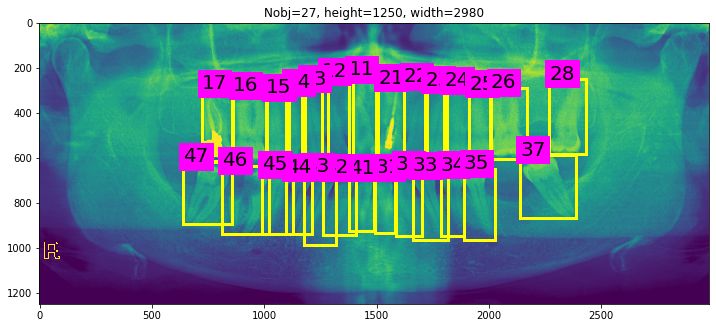

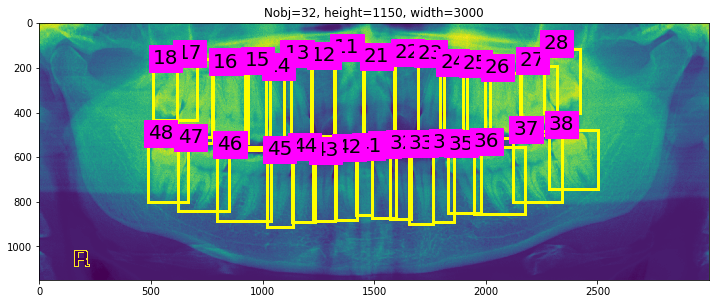

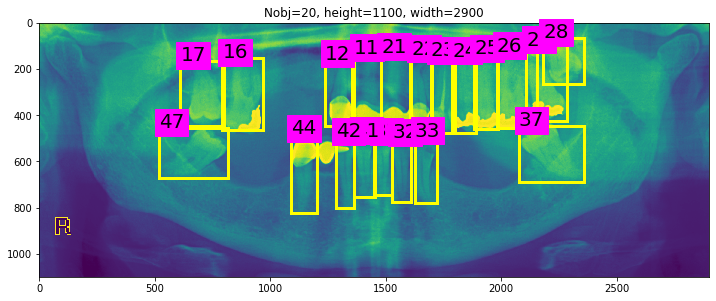

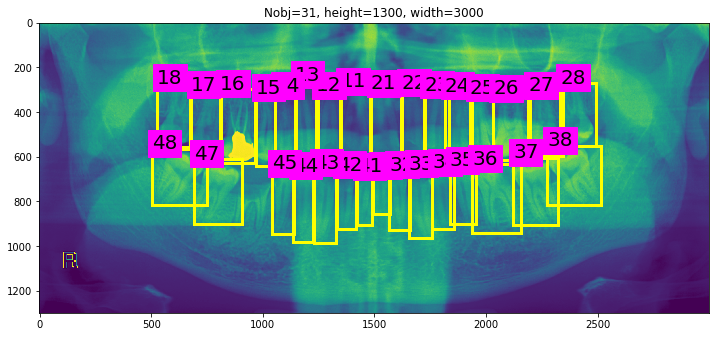

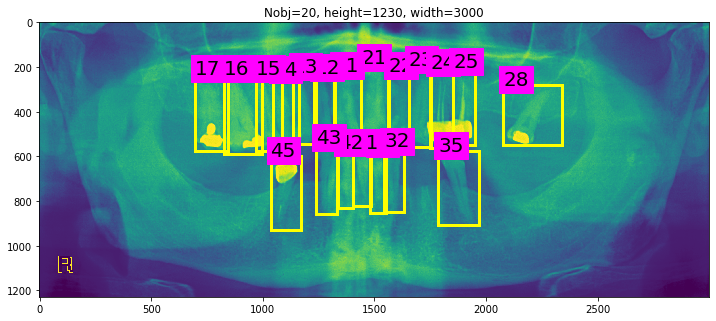

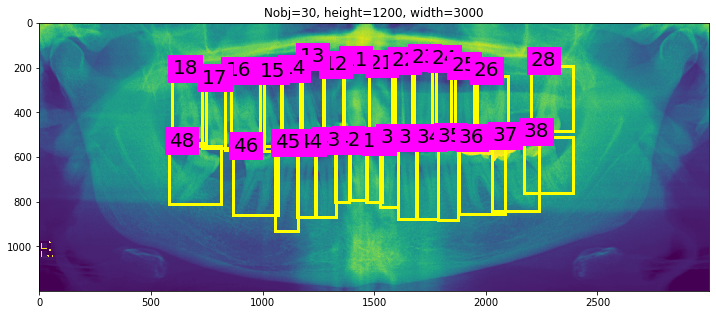

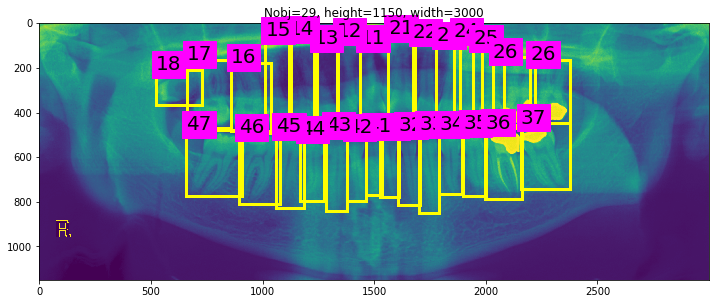

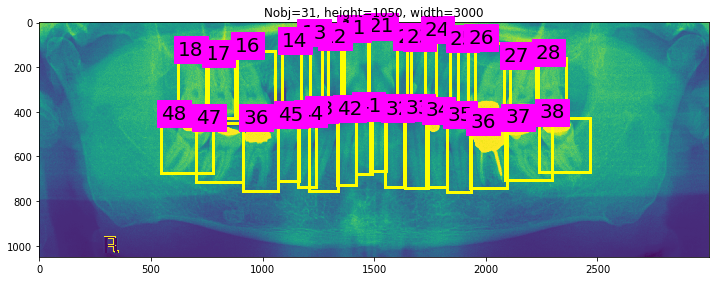

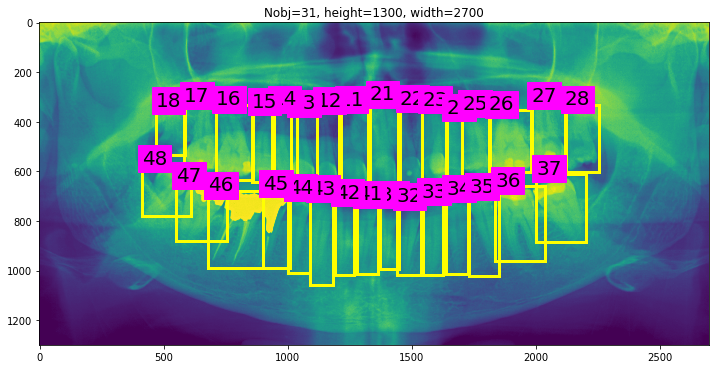

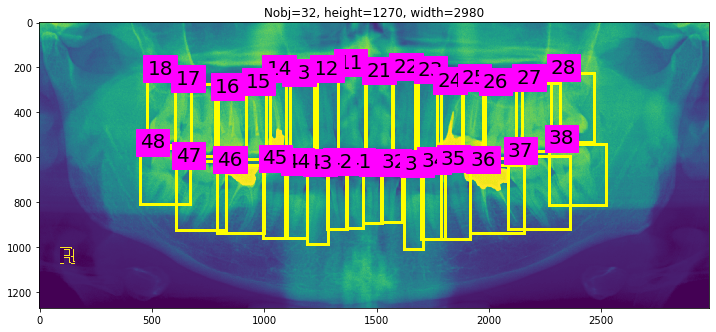

In [20]:
import imageio
def plt_rectangle(plt,label,x1,y1,x2,y2):
    '''
    == Input ==
    
    plt   : matplotlib.pyplot object
    label : string containing the object class name
    x1    : top left corner x coordinate
    y1    : top left corner y coordinate
    x2    : bottom right corner x coordinate
    y2    : bottom right corner y coordinate
    '''
    linewidth = 3
    color = "yellow"
    plt.text(x1,y1,label,fontsize=20,backgroundcolor="magenta")
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color)
    
# randomly select 20 frames    
size = 20    
ind_random = np.random.randint(0,df_anno.shape[0],size=size)
for irow in ind_random:
    row  = df_anno.iloc[irow,:]
    path = os.path.join(img_dir, row["fileID"] + ".png")
    # read in image
    img  = imageio.imread(path)

    plt.figure(figsize=(12,12))
    plt.imshow(img) # plot image
    plt.title("Nobj={}, height={}, width={}".format(row["Nobj"],row["height"],row["width"]))
    # for each object in the image, plot the bounding box
    for iplot in range(row["Nobj"]):
        plt_rectangle(plt,
                      label = row["bbx_{}_name".format(iplot)],
                      x1=row["bbx_{}_xmin".format(iplot)],
                      y1=row["bbx_{}_ymin".format(iplot)],
                      x2=row["bbx_{}_xmax".format(iplot)],
                      y2=row["bbx_{}_ymax".format(iplot)])
    plt.show() ## show the plot

In [21]:
#L'algorithme R-CNN se compose de trois étapes 
#(1) Générer des propositions de région, 
#(2) Créer des entités CNN et 
#(3) Classer chaque région en classes par SVM.

In [22]:
#Étape 1: créer des régions initiales grâce à l'algorithme de segmentation graphique efficace de Felzenszwalb

In [23]:
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.misc
import skimage.segmentation
import skimage.feature
from copy import copy

In [24]:
## This must be the location of the PASCAL VOC data. 
img_dir = "/Users/charleshajjar/Desktop/annotation_dent/dent-PascalVOC-export/JPEGImages"

In [25]:
def image_segmentation(img_8bit, scale = 1.0, sigma = 0.8, min_size = 50):
    '''
    J.R.R. Uijlings's hierarchical grouping algorithm 
    
    == input ==
    img_8bit : shape = (height, width, 3),
               8-bits degital image (each digit ranges between 0 - 255)
    
    == output ==
    img      : shape = (height, width, 4)
    '''
    # convert the image to range between 0 and 1
    img_float = skimage.util.img_as_float(img_8bit)
    im_mask   = skimage.segmentation.felzenszwalb(
                    img_float, 
                    scale    = scale, 
                    sigma    = sigma,
                    min_size = min_size)
    img       = np.dstack([img_8bit,im_mask])
    return(img)


In [26]:
#le code cidessous augmentation ou reduction des zones 

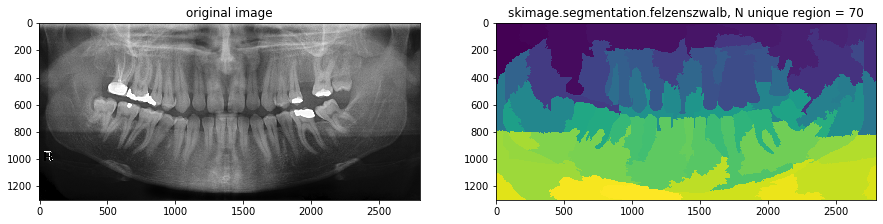

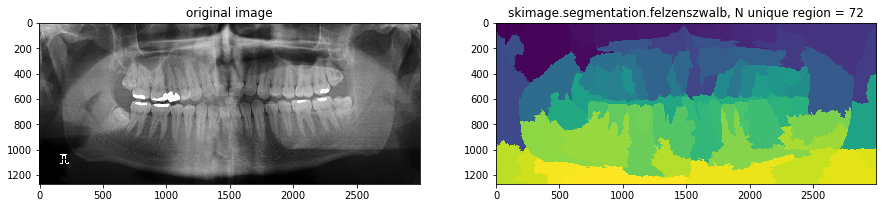

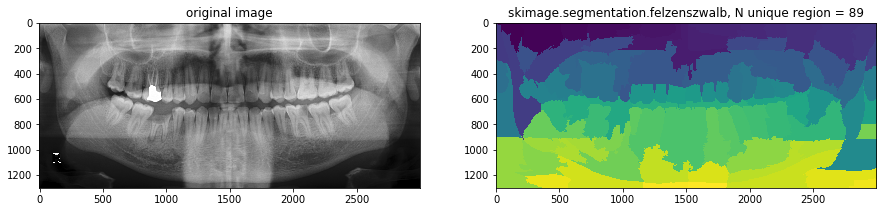

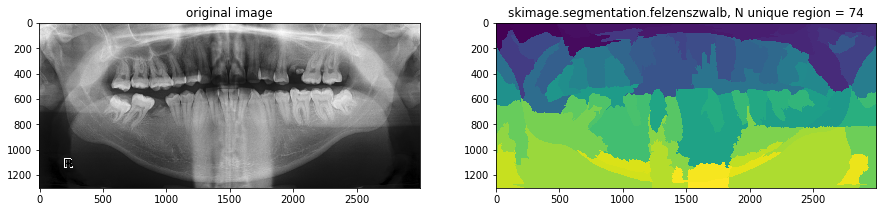

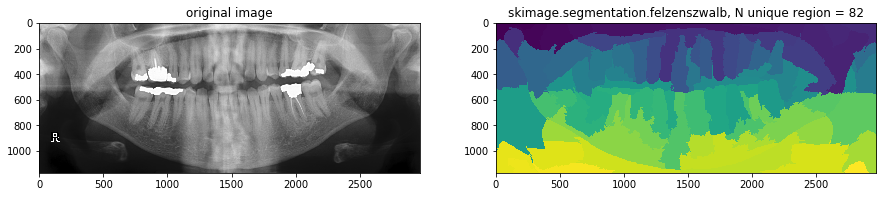

In [28]:
import matplotlib.pyplot
import cv2
scale    = 1.0
sigma    = 0.8
# min_size may be around 50 for better RCNN performance but for the sake of visualization, I will stick to min_size =500
min_size = 10000 # 500 3000

np.random.seed(4)
listed_path = os.listdir(img_dir)
Nplot = 5
random_img_path = np.random.choice(listed_path,Nplot)
for imgnm in random_img_path:
    # import 8 bits degital image (each digit ranges between 0 - 255)
    img_8bit  = cv2.imread(os.path.join(img_dir,imgnm))
    img       = image_segmentation(img_8bit, scale, sigma, min_size)
    
    fig = plt.figure(figsize=(15,30))
    ax  = fig.add_subplot(1,2,1)
    ax.imshow(img_8bit)
    ax.set_title("original image")
    ax  = fig.add_subplot(1,2,2)
    ax.imshow(img[:,:,3])
    ax.set_title("skimage.segmentation.felzenszwalb, N unique region = {}".format(len(np.unique(img[:,:,3]))))
    plt.show()

In [29]:
def extract_region(img):
    '''
    For each segmented region,
    extract smallest rectangle regions covering the smallest segmented region.
    
    == input ==
    img : (height, width, N channel)
          N channel = [R, G, B , L], L = label for the region
          only the L channel is used in this analysis 
    == output ==
    
    dictionary R :
    
    {0: {'labels': [0], 'max_x': 131, 'max_y': 74, 'min_x': 0,   'min_y': 0},
     1: {'labels': [1], 'max_x': 189, 'max_y': 37, 'min_x': 75,  'min_y': 0},
     2: {'labels': [2], 'max_x': 282, 'max_y': 38, 'min_x': 162, 'min_y': 0},
     3: {'labels': [3], 'max_x': 499, 'max_y': 23, 'min_x': 247, 'min_y': 0},
     4: {'labels': [4], 'max_x': 499, 'max_y': 74, 'min_x': 428, 'min_y': 13},
     5: {'labels': [5], 'max_x': 441, 'max_y': 76, 'min_x': 333, 'min_y': 16},
     6: {'labels': [6], 'max_x': 348, 'max_y': 80, 'min_x': 62,  'min_y': 21},
    '''
    ## only use the segmentation output
    img_segment = img[:,:,3]
    R = {}
    for y, i in enumerate(img_segment): ## along vertical axis 

        for x, l in enumerate(i): ## along horizontal axis
            # initialize a new region
            if l not in R:
                R[l] = {"min_x": np.Inf, 
                        "min_y": np.Inf,
                        "max_x": 0, 
                        "max_y": 0, 
                        "labels": [l]}

            # bounding box
            if R[l]["min_x"] > x:
                R[l]["min_x"] = x
            if R[l]["min_y"] > y:
                R[l]["min_y"] = y
            if R[l]["max_x"] < x:
                R[l]["max_x"] = x
            if R[l]["max_y"] < y:
                R[l]["max_y"] = y
    ## remove region if it does not have positive height or positive width
    
    Rcopy = copy(R)
    for key in R.keys():
        r = R[key]
        if (r["min_x"] == r["max_x"]) or (r["min_y"] == r["max_y"]):
            del Rcopy[key]
    return(Rcopy)
R = extract_region(img)
print("{} rectangle regions are found".format(len(R)))

82 rectangle regions are found


In [30]:
#affichage des rectangle region decelé lors du traitement d'images 

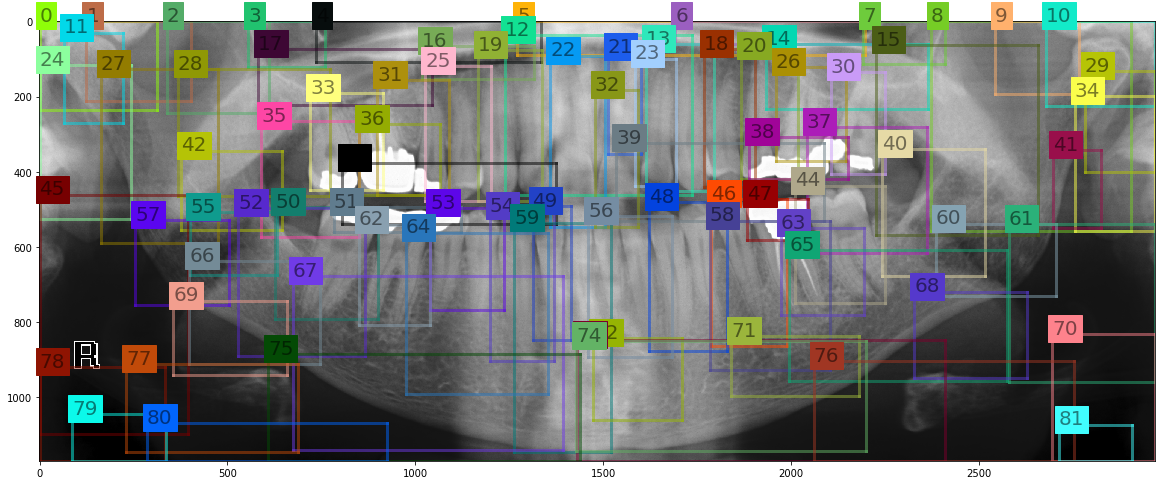

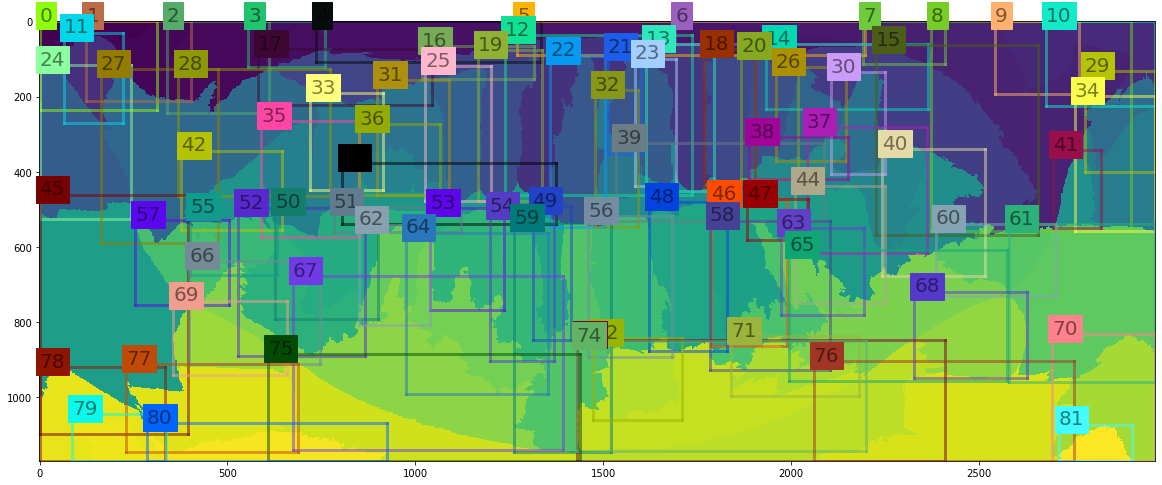

In [31]:
def plt_rectangle(plt,label,x1,y1,x2,y2,color = "yellow", alpha=0.5):
    linewidth = 3
    if type(label) == list:
        linewidth = len(label)*3 + 2
        label = ""
        
    plt.text(x1,y1,label,fontsize=20,backgroundcolor=color,alpha=alpha)
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color, alpha=alpha)

figsize = (20,20)
plt.figure(figsize=figsize)    
plt.imshow(img[:,:,:3]/2**8)
for item, color in zip(R.values(),sns.xkcd_rgb.values()):
    x1 = item["min_x"]
    y1 = item["min_y"]
    x2 = item["max_x"]
    y2 = item["max_y"]
    label = item["labels"][0]
    plt_rectangle(plt,label,x1,y1,x2,y2,color=color)
plt.show()

plt.figure(figsize=figsize)    
plt.imshow(img[:,:,3])
for item, color in zip(R.values(),sns.xkcd_rgb.values()):
    x1 = item["min_x"]
    y1 = item["min_y"]
    x2 = item["max_x"]
    y2 = item["max_y"]
    label = item["labels"][0]
    plt_rectangle(plt,label,x1,y1,x2,y2,color=color)
plt.show()


In [32]:
#Opérateur de texture Modèle binaire local (LBP)
#Pour capturer les similitudes de texture des régions initiales, 
#pour chaque région initiale, calculez les entités LBP

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


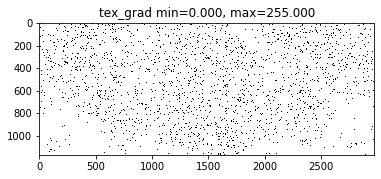

In [33]:
def calc_texture_gradient(img):
    """
        calculate texture gradient for entire image

        The original SelectiveSearch algorithm proposed Gaussian derivative
        for 8 orientations, but we use LBP instead.

        output will be [height(*)][width(*)]
    """
    ret = np.zeros(img.shape[:4])
    for colour_channel in (0, 1, 2):
        ret[:, :, colour_channel] = skimage.feature.local_binary_pattern(
            img[:, :, colour_channel], 8, 1.0)

    return ret


def plot_image_with_min_max(img,nm):
    img = img[:,:,:3]
    plt.imshow(img)
    plt.title("{} min={:5.3f}, max={:5.3f}".format(nm,
                                                   np.min(img),
                                                   np.max(img)))
    plt.show()

tex_grad = calc_texture_gradient(img)   
plot_image_with_min_max(tex_grad,nm="tex_grad")

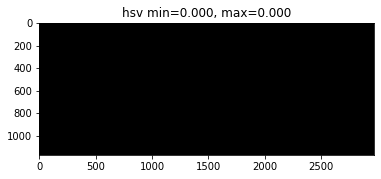

In [34]:
def calc_hsv(img):
    hsv = skimage.color.rgb2hsv(img[:,:,:3])
    return(hsv)

hsv = calc_hsv(img)
plot_image_with_min_max(hsv,nm="hsv")

In [36]:
def calc_hist(img, minhist=0, maxhist=1):
    """
        calculate colour histogram for each region

        the size of output histogram will be BINS * COLOUR_CHANNELS(3)

        number of bins is 25 as same as [uijlings_ijcv2013_draft.pdf]

        extract HSV
        
        len(hist) = BINS * 3
        hist[:BINS] = [0, 10, 20, 0,...,0] meaning that 
           there are 10 pixels that have values between (maxhist - minhist)/BINS*1 and (maxhist - minhist)/BINS*2
           there are 10 pixels that have values between (maxhist - minhist)/BINS*2 and (maxhist - minhist)/BINS*3
    
    """

    BINS = 25
    hist = np.array([])

    for colour_channel in range(3):

        # extracting one colour channel
        c = img[:, colour_channel]

        # calculate histogram for each colour and join to the result
        hist = np.concatenate(
            [hist] + [np.histogram(c, BINS, 
                                   # The lower and upper range of the bins. 
                                   (minhist, maxhist))[0]])

    # L1 normalize
    hist = hist / len(img)
    return hist

def augment_regions_with_histogram_info(tex_grad, img, R,hsv,tex_trad):
    for k, v in list(R.items()):

        ## height and width axies are flattened. 
        ## masked_pixel.shape = (N pixel with this mask ID , 3)
        masked_pixels  = hsv[img[:, :, 3] == k] 
        R[k]["size"]   = len(masked_pixels / 4)
        R[k]["hist_c"] = calc_hist(masked_pixels,minhist=0, maxhist=1)

        # texture histogram
        R[k]["hist_t"] = calc_hist(tex_grad[img[:, :, 3] == k],minhist=0, maxhist=2**8-1)
    return(R)
R = augment_regions_with_histogram_info(tex_grad, img,R,hsv,tex_grad)
R

{0: {'min_x': 0,
  'min_y': 0,
  'max_x': 312,
  'max_y': 237,
  'labels': [0],
  'size': 19239,
  'hist_c': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  'hist_t': array([0.13212745, 0.08243672, 0.08160507, 0.04132231, 0.01117522,
         0.04807942, 0.06414055, 0.01086335, 0.00410624, 0.01871199,
         0.0175165 , 0.02957534, 0.08150112, 0.0161131 , 0.01699673,
         0.01663288, 0.0004678 , 0.00301471, 0.02915952, 0.03555278,
         0.01632101, 0.02193461, 0.02224648, 0.03976298, 0.1586361 ,
         0.13212745, 0.08243672, 0.08160507, 0.04132231, 0.01117522,
         0.04807942, 0.06414055, 0.01086335, 0.00410624, 0.01871199,
         0.0175165 , 0.02957534, 0.08150112, 0.016113

In [37]:
def extract_neighbours(regions):
    '''
    check if two regions intersect 
    '''

    def intersect(a, b):
        if (a["min_x"] < b["min_x"] < a["max_x"] and a["min_y"] < b["min_y"] < a["max_y"]) or\
           (a["min_x"] < b["max_x"] < a["max_x"] and a["min_y"] < b["max_y"] < a["max_y"]) or\
           (a["min_x"] < b["min_x"] < a["max_x"] and a["min_y"] < b["max_y"] < a["max_y"]) or\
           (a["min_x"] < b["max_x"] < a["max_x"] and a["min_y"] < b["min_y"] < a["max_y"]):
            return True
        return False

    R = list(regions.items())
    neighbours = []
    for cur, a in enumerate(R[:-1]):
        for b in R[cur + 1:]:
            if intersect(a[1], b[1]):
                neighbours.append((a, b))

    return neighbours

neighbours = extract_neighbours(R)
print("Out of {} regions, we found {} intersecting pairs".format(len(R),len(neighbours)))

Out of 82 regions, we found 239 intersecting pairs


In [38]:
#Pour chaque paire de régions qui se croisent, 
#calculez les similitudes des deux régions.

In [39]:
def _sim_colour(r1, r2):
    """
        calculate the sum of histogram intersection of colour
    """
    return sum([min(a, b) for a, b in zip(r1["hist_c"], r2["hist_c"])])


def _sim_texture(r1, r2):
    """
        calculate the sum of histogram intersection of texture
    """
    return sum([min(a, b) for a, b in zip(r1["hist_t"], r2["hist_t"])])


def _sim_size(r1, r2, imsize):
    """
        calculate the size similarity over the image
    """
    return 1.0 - (r1["size"] + r2["size"]) / imsize


def _sim_fill(r1, r2, imsize):
    """
        calculate the fill similarity over the image
    """
    bbsize = (
        (max(r1["max_x"], r2["max_x"]) - min(r1["min_x"], r2["min_x"]))
        * (max(r1["max_y"], r2["max_y"]) - min(r1["min_y"], r2["min_y"]))
    )
    return 1.0 - (bbsize - r1["size"] - r2["size"]) / imsize
def calc_sim(r1, r2, imsize):
    return (_sim_colour(r1, r2)       +\
            _sim_texture(r1, r2)      +\
            _sim_size(r1, r2, imsize) +\
            _sim_fill(r1, r2, imsize))

def calculate_similarlity(img,neighbours,verbose=False):
    # calculate initial similarities
    imsize = img.shape[0] * img.shape[1]
    S = {}
    for (ai, ar), (bi, br) in neighbours:
        S[(ai, bi)] = calc_sim(ar, br, imsize)
        if verbose:
            print("S[({:2.0f}, {:2.0f})]={:3.2f}".format(ai,bi,S[(ai, bi)]))
    return(S)

print("S[(Pair of the intersecting regions)] = Similarity index")
S = calculate_similarlity(img,neighbours,verbose=True)

S[(Pair of the intersecting regions)] = Similarity index
S[( 0,  1)]=7.67
S[( 0, 11)]=7.70
S[( 0, 24)]=7.64
S[( 0, 27)]=7.49
S[( 1, 11)]=7.79
S[( 1, 24)]=7.78
S[( 1, 27)]=7.69
S[( 1, 28)]=7.74
S[( 2,  3)]=7.65
S[( 2, 17)]=7.62
S[( 2, 27)]=7.78
S[( 2, 28)]=7.73
S[( 3,  4)]=7.49
S[( 3, 17)]=7.70
S[( 4,  5)]=7.68
S[( 4, 12)]=7.40
S[( 4, 16)]=7.42
S[( 4, 17)]=7.70
S[( 4, 19)]=7.30
S[( 5,  6)]=7.32
S[( 5, 12)]=7.44
S[( 5, 13)]=7.37
S[( 5, 14)]=7.58
S[( 5, 16)]=7.55
S[( 5, 18)]=7.33
S[( 5, 19)]=7.24
S[( 5, 20)]=7.31
S[( 5, 21)]=7.32
S[( 6, 12)]=7.01
S[( 6, 13)]=7.16
S[( 6, 14)]=7.32
S[( 7, 14)]=7.73
S[( 7, 15)]=7.58
S[( 8,  9)]=7.72
S[( 8, 10)]=7.57
S[( 8, 15)]=7.72
S[( 8, 29)]=7.70
S[( 8, 34)]=7.55
S[( 8, 40)]=7.70
S[( 8, 41)]=7.78
S[( 8, 60)]=7.67
S[( 8, 61)]=6.56
S[( 9, 15)]=7.79
S[(10, 29)]=7.62
S[(10, 34)]=7.58
S[(11, 27)]=7.74
S[(12, 13)]=7.73
S[(12, 16)]=7.47
S[(12, 19)]=7.65
S[(12, 21)]=7.69
S[(12, 22)]=7.76
S[(12, 23)]=7.71
S[(12, 32)]=7.71
S[(12, 39)]=7.67
S[(12, 43)]=7.48
S[(13, 1

In [40]:
#L'épaisseur du cadre de sélection indique le nombre de régions initiales fusionnées.

In [41]:
def merge_regions(r1, r2):
    '''
    Suppose r1 and r2 look like: 
    
    (minx1, miny1)
          _____________________
          |                   |
          |     (minx2,maxy2) |
          |           ________|____ 
          |          |        |    |
          |          |        |    |
          |          |________|____|(maxx2, maxy2)
          |___________________|(maxx1, maxy1)
          
    Then for merged region,
    
    minx : minx1
    miny : miny1
    maxx : maxx2
    maxy : maxy1 
    size : the number of pixels in the two regions (intersection is counted twice?)
    
                         
    '''
    new_size = r1["size"] + r2["size"]
    rt = {
        "min_x": min(r1["min_x"], r2["min_x"]),
        "min_y": min(r1["min_y"], r2["min_y"]),
        "max_x": max(r1["max_x"], r2["max_x"]),
        "max_y": max(r1["max_y"], r2["max_y"]),
        "size": new_size,
        "hist_c": (r1["hist_c"] * r1["size"] + r2["hist_c"] * r2["size"]) / new_size,
        "hist_t": (r1["hist_t"] * r1["size"] + r2["hist_t"] * r2["size"]) / new_size,
        "labels": r1["labels"] + r2["labels"]
    }
    return rt

def merge_regions_in_order(S,R,imsize, verbose=False):
    '''
    == Input ==
    S : similarity dictionary
    
    R : dictionary of proposed regions
    
    == Output ==
    
    regions : list of regions
    
    '''
    # hierarchal search
    while S != {}:

        # Step 1: get highest similarity pair of regions from the similarlity dictionary
        i, j = sorted(S.items(), key=lambda i: i[1])[-1][0]

        # Step 2: marge the region pair and add to the region dictionary
        t = max(R.keys()) + 1.0
        R[t] = merge_regions(R[i], R[j])

        # Step 3: from the similarity dictionary, 
        #         remove all the pair of regions where one of the regions is selected in Step 1
        key_to_delete = []
        for k, v in list(S.items()):
            if (i in k) or (j in k):
                key_to_delete.append(k)
        for k in key_to_delete:
            del S[k]

        # Step 4: calculate similarity with new merged region and the regions and its intersecting region
        #         (intersecting region is the region that are to be deleted)
        for k in key_to_delete:
            if k != (i,j):
                if k[0] in (i, j):
                    n = k[1]
                else:
                    n = k[0]
                S[(t, n)] = calc_sim(R[t], R[n], imsize)
    if verbose:
        print("{} regions".format(len(R)))

    ## finally return list of region proposal
    regions = []
    for k, r in list(R.items()):
            regions.append({
                'rect': (
                    r['min_x'],              # min x
                    r['min_y'],              # min y
                    r['max_x'] - r['min_x'], # width 
                    r['max_y'] - r['min_y']),# height
                'size': r['size'],
                'labels': r['labels']
            })
    return(regions)



regions = merge_regions_in_order(S,R,img.shape[0]*img.shape[1],verbose=True)

163 regions


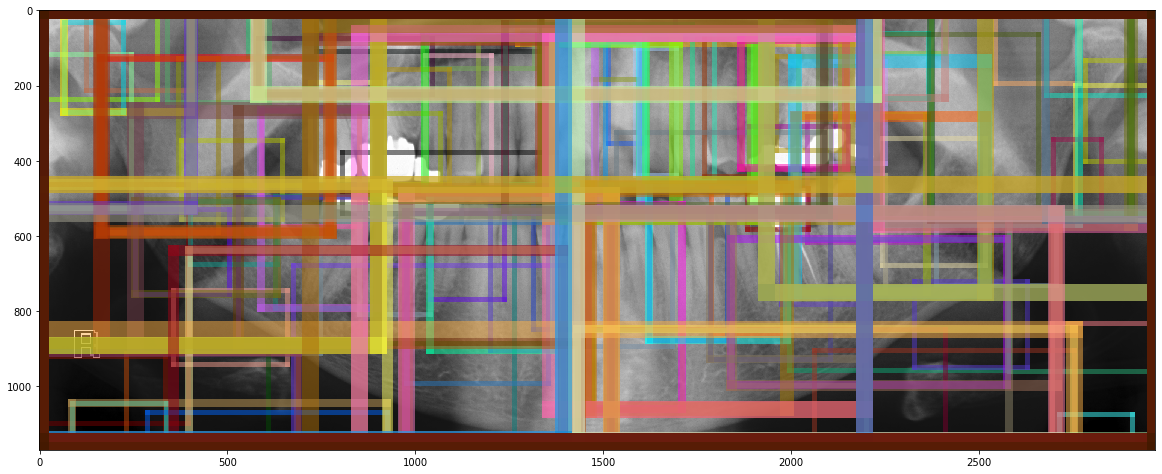

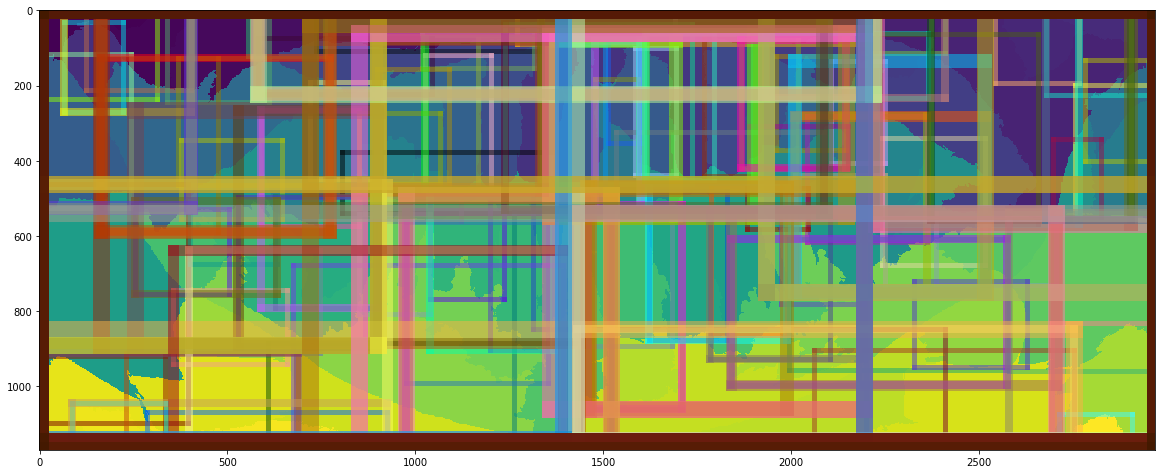

In [42]:
plt.figure(figsize=(20,20))    
plt.imshow(img[:,:,:3]/2**8)
for item, color in zip(regions,sns.xkcd_rgb.values()):
    x1, y1, width, height = item["rect"]
    label = item["labels"][:5]
    plt_rectangle(plt,label,x1,y1,x2 = x1 + width,y2 = y1 + height, color = color)
plt.show()

plt.figure(figsize=(20,20))    
plt.imshow(img[:,:,3])
for item, color in zip(regions,sns.xkcd_rgb.values()):
    x1, y1, width, height = item["rect"]
    label = item["labels"][:5]
    plt_rectangle(plt,label,
                  x1,
                  y1,
                  x2 = x1 + width,
                  y2 = y1 + height, color= color)
plt.show()

In [43]:
def get_region_proposal(img_8bit,min_size = 7000):
    img        = image_segmentation(img_8bit,min_size = min_size)
    R          = extract_region(img)    
    tex_grad   = calc_texture_gradient(img)
    hsv        = calc_hsv(img)
    R          = augment_regions_with_histogram_info(tex_grad, img, R,hsv,tex_grad)
    del tex_grad, hsv
    neighbours = extract_neighbours(R)
    S          = calculate_similarlity(img,neighbours)
    regions    = merge_regions_in_order(S,R,imsize = img.shape[0] * img.shape[1])
    return(regions)
regions = get_region_proposal(img_8bit,min_size=7000)

regions
print("{} regions are found".format(len(regions)))

217 regions are found


In [52]:
import pandas as pd
dir_preprocessed = "/Users/charleshajjar/Desktop/annotation_dent/dent-PascalVOC-export/"
df_anno = pd.read_csv(os.path.join(dir_preprocessed,"df_anno.csv"),low_memory=False)

In [53]:
#Conservez les images qui contiennent au moins un objet ou labelle .

In [60]:
cols_bbx = []
for colnm in df_anno.columns:
    if "name" in colnm:
        cols_bbx.append(colnm)
bbx_has_personTF = df_anno[cols_bbx].values == "person"
pick = np.any(bbx_has_personTF,axis=1)
df_anno_person = df_anno.loc[pick,:]

In [61]:
#Définissez une fonction qui calcule l'intersection sur l'Union entre deux régions.

In [62]:
def get_IOU(xmin1,ymin1,xmax1,ymax1,
            xmin2,ymin2,xmax2,ymax2):
    '''
     
    (minx1, miny1)
          _____________________
          |                   |
          |     (minx2,maxy2) |
          |           ________|____ 
          |          |        |    |
          |          |        |    |
          |          |________|____|(maxx2, maxy2)
          |___________________|(maxx1, maxy1)
          
    
                         
    '''    
    def get_wha(xmin1,xmax1,ymin1,ymax1):
            width1  = xmax1 - xmin1
            height1 = ymax1 - ymin1
            area1   = width1 * height1
            return(width1,height1,area1)
    width1,height1,area1 = get_wha(xmin1,xmax1,ymin1,ymax1)
    width2,height2,area2 = get_wha(xmin2,xmax2,ymin2,ymax2)
            
    int_xmin   = np.max([xmin1,xmin2])
    int_ymin   = np.max([ymin1,ymin2])
    int_xmax   = np.min([xmax1,xmax2])
    int_ymax   = np.min([ymax1,ymax2])            
    int_width  = int_xmax - int_xmin
    int_height = int_ymax - int_ymin
    int_area   = int_width*int_height    
    
    if (int_width < 0) or (int_height < 0):
        IOU = 0
    else:
        IOU = int_area / float(area1 + area2 - int_area)
    return(IOU)

In [63]:
import time, imageio
            
start = time.time()            
person_found_vec = []
for irow in range(df_anno_person.shape[0]): ## run over each frame
    row  = df_anno_person.iloc[irow,:]
    path = os.path.join(img_dir,row["/Users/charleshajjar/Desktop/annotation_dent/dent-PascalVOC-export/JPEGImages"] + ".png")
    img  = imageio.imread(path)
    
    ## calculate region proposal
    regions = get_region_proposal(img,min_size=40)
    
    for ibb in range(row["Nobj"]): ## go over each of the true annotated object
        print("frameID = {:04.0f}/{}, BBXID = {},  N region proposals = {}".format(
            irow, df_anno_person.shape[0], ibb, len(regions)))
        name = row["bbx_{}_name".format(ibb)]
        if name != "person":
            continue 
        ## bounding box of the person     
        true_xmin   = row["bbx_{}_xmin".format(ibb)]
        true_ymin   = row["bbx_{}_ymin".format(ibb)]
        true_xmax   = row["bbx_{}_xmax".format(ibb)]
        true_ymax   = row["bbx_{}_ymax".format(ibb)]   
        person_found_TF = 0
        for r in regions:  ## go over each region proposal and calculate the IoU
            
            prpl_xmin, prpl_ymin, prpl_width, prpl_height = r["rect"]
            IoU = get_IOU(prpl_xmin, prpl_ymin, prpl_xmin + prpl_width, prpl_ymin + prpl_height,
                          true_xmin, true_ymin, true_xmax, true_ymax)
            if IoU > 0.5:
                person_found_TF = 1
        person_found_vec.append(person_found_TF)
end = time.time()  
print("TIME TOOK : {}MIN".format((end-start)/60))
print("Total N of person : {}, Total N of person found : {}, TPR: {:4.3f}".format(
    len(person_found_vec),
    np.sum(person_found_vec),
    np.mean(person_found_vec)))

TIME TOOK : 5.582968393961589e-06MIN
Total N of person : 0, Total N of person found : 0.0, TPR:  nan


In [64]:
print("Total N of person : {}, Total N of person found : {}, TPR: {:4.3f}".format(
    len(person_found_vec),
    np.sum(person_found_vec),
    np.mean(person_found_vec)))

Total N of person : 0, Total N of person found : 0.0, TPR:  nan


In [74]:
import numpy as np
import pandas as pd
import os, sys 
import scipy.misc
import matplotlib.pyplot as plt
import random
import imageio
import skimage
print(sys.version)

3.7.7 (default, Mar 23 2020, 17:31:31) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
